# Explore the datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime


In [2]:
price_data = pd.read_csv(
    '../price_history/processed_datasets/price_history.csv', index_col="timestamp")
tweets_data = pd.read_csv(
    '../tweets/processed_datasets/tweets_count.csv', index_col="timestamp")


Since the datasets contain datapoints with the same timestamp (can be considered index in this case) we can go ahead and merge the datasets by the index.

In [3]:
merged_data = pd.merge(price_data, tweets_data,
                       left_index=True, right_index=True).dropna()
merged_data.head()


,dogecoin_price,dogecoin_market_cap,dogecoin_volume,bitcoin_price,bitcoin_market_cap,bitcoin_volume,Unnamed: 0,tweets_count,usernames_count,likes_sum,...,positive_score_sum,negative_score_sum,neutral_score_sum,likes_mean,replies_mean,retweets_mean,compound_score_mean,positive_score_mean,negative_score_mean,neutral_score_mean
timestamp,,,,,,,,,,,,,,,,,,,,,
1609462800,0.004653,5.937593e+08,1.259312e+08,29018.489653,5.393663e+11,3.778730e+10,1,25,25,34,...,3.607,0.769,24.624,1.172414,0.275862,0.034483,0.162866,0.124379,0.026517,0.849103
1609466400,0.004732,6.063915e+08,1.202944e+08,29347.055386,5.446743e+11,3.804019e+10,2,24,24,56,...,3.479,0.427,22.094,2.153846,0.384615,2.730769,0.213681,0.133808,0.016423,0.849769
1609470000,0.004757,6.062425e+08,1.176953e+08,29261.317587,5.438828e+11,3.908687e+10,3,23,23,41,...,2.573,0.746,22.681,1.576923,0.269231,0.307692,0.158788,0.098962,0.028692,0.872346
1609473600,0.004929,6.296742e+08,1.259609e+08,29324.678366,5.450615e+11,3.896300e+10,4,39,39,47,...,4.390,0.814,37.796,1.093023,0.186047,0.441860,0.139400,0.102093,0.018930,0.878977
1609477200,0.004889,6.239115e+08,1.337259e+08,29169.454063,5.420030e+11,3.873582e+10,5,32,32,279,...,6.805,1.820,26.378,7.971429,0.771429,1.857143,0.262431,0.194429,0.052000,0.753657


Plot Dogecoin price and tweets amount over time.

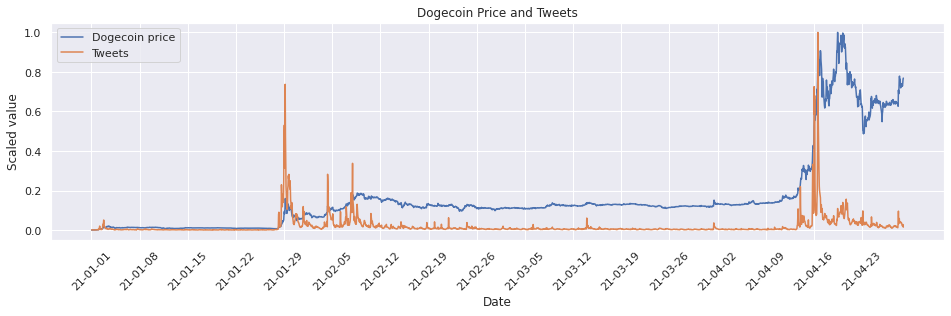

In [4]:
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(merged_data),
                           columns=merged_data.columns, index=merged_data.index)

sns.set_theme(style="darkgrid")
plt.figure(figsize=(16, 4))
plt.plot(scaled_data.index, scaled_data.dogecoin_price, label="Dogecoin price")
plt.plot(scaled_data.index, scaled_data.tweets_count, label="Tweets")
plt.xticks(range(1609459200, 1619740800, 604800), [
    datetime.fromtimestamp(ts).strftime('%y-%m-%d') for ts in range(1609459200, 1619740800, 604800)
], rotation='45')
plt.xlabel('Date')
plt.ylabel('Scaled value')
plt.title("Dogecoin Price and Tweets")
plt.legend()
plt.show()


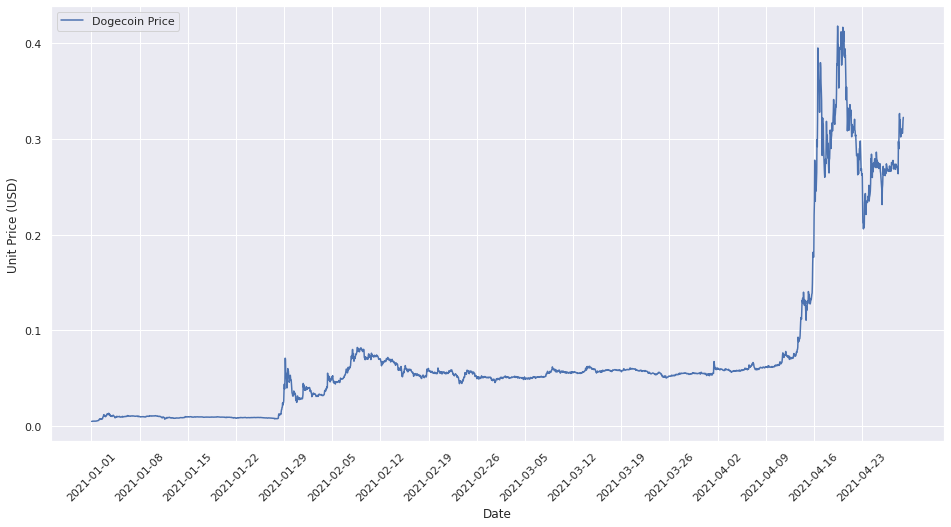

In [5]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16, 8))
plt.plot(merged_data.index, merged_data.dogecoin_price, label="Dogecoin Price")
plt.plot(merged_data.index, merged_data.bitcoin_price, label="Bitcoin Price")
plt.plot(merged_data.index, merged_data.tweets_count, label="Tweets")
plt.xticks(range(1609459200, 1619740800, 604800), [
    datetime.fromtimestamp(ts).strftime('%Y-%m-%d') for ts in range(1609459200, 1619740800, 604800)
], rotation='45')
plt.xlabel('Date')
plt.ylabel('Unit Price (USD)')
plt.legend()
plt.show()
